In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('/content/drive/MyDrive/Google Drive/Training Data.csv')
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


# Descriptive Statistic

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [22]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


Notes:
1. Semua tipe data dan jumlah row pada setiap kolom telah sesuai
2. Tidak ada kolom yang bernilai null
3. Tidak ada kolom yang memiliki nilai summary aneh

# EDA

In [23]:
# 1. Pengelompokan Usia (Age Binning)
# Fungsi untuk menentukan generasi berdasarkan usia
def assign_generation(age):
    if 20 <= age < 30:
        return 'Millennials'
    elif 30 <= age < 40:
        return 'Generation X'
    elif 40 <= age < 50:
        return 'Generation Y'
    elif 50 <= age < 60:
        return 'Baby Boomers'
    elif 60 <= age <= 80:
        return 'Silent Generation'
    else:
        return 'Other'

# Menambahkan kolom 'Generation' ke DataFrame
df['Generation'] = df['Age'].apply(assign_generation)

# 2. Pengelompokan Profesi
profession_groups = {
    'Engineering': ['Mechanical_engineer', 'Design_Engineer', 'Chemical_engineer', 'Petroleum_Engineer', 'Computer_hardware_engineer', 'Biomedical_Engineer', 'Civil_engineer', 'Industrial_Engineer'],
    'Technology': ['Software_Developer', 'Technical_writer', 'Air_traffic_controller', 'Computer_operator', 'Web_designer', 'Technology_specialist'],
    'Healthcare': ['Physician', 'Dentist', 'Surgeon', 'Microbiologist', 'Scientist'],
    'Finance': ['Financial_Analyst', 'Chartered_Accountant'],
    'Design': ['Architect', 'Designer', 'Graphic_Designer', 'Fashion_Designer'],
    'Management': ['Civil_servant', 'Hotel_Manager', 'Secretary', 'Consultant'],
    'Public_Service': ['Librarian', 'Politician', 'Police_officer', 'Official', 'Magistrate', 'Firefighter', 'Army_officer'],
    'Arts_Entertainment': ['Artist', 'Comedian', 'Aviator', 'Psychologist', 'Lawyer', 'Analyst', 'Geologist', 'Drafter', 'Statistician', 'Chef']
}
df['Profession_Group'] = df['Profession'].map({prof: group for group, prof_list in profession_groups.items() for prof in prof_list})

# 3. Rasio Pengalaman Kerja terhadap Umur
df['Experience_Ratio'] = df['Experience'] / df['Age']

# 4. Rasio Jumlah Tahun Pekerjaan terhadap Jumlah Tahun Tinggal di Rumah
df['Job_House_Duration_Ratio'] = df['CURRENT_JOB_YRS'] / df['CURRENT_HOUSE_YRS']

In [24]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Generation,Profession_Group,Experience_Ratio,Job_House_Duration_Ratio
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,Millennials,Engineering,0.130435,0.230769
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,Generation Y,Technology,0.250000,0.692308
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,Silent Generation,Technology,0.060606,0.400000
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,Generation Y,Technology,0.048780,0.166667
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,Generation Y,Management,0.234043,0.214286


# Univariate Analysis

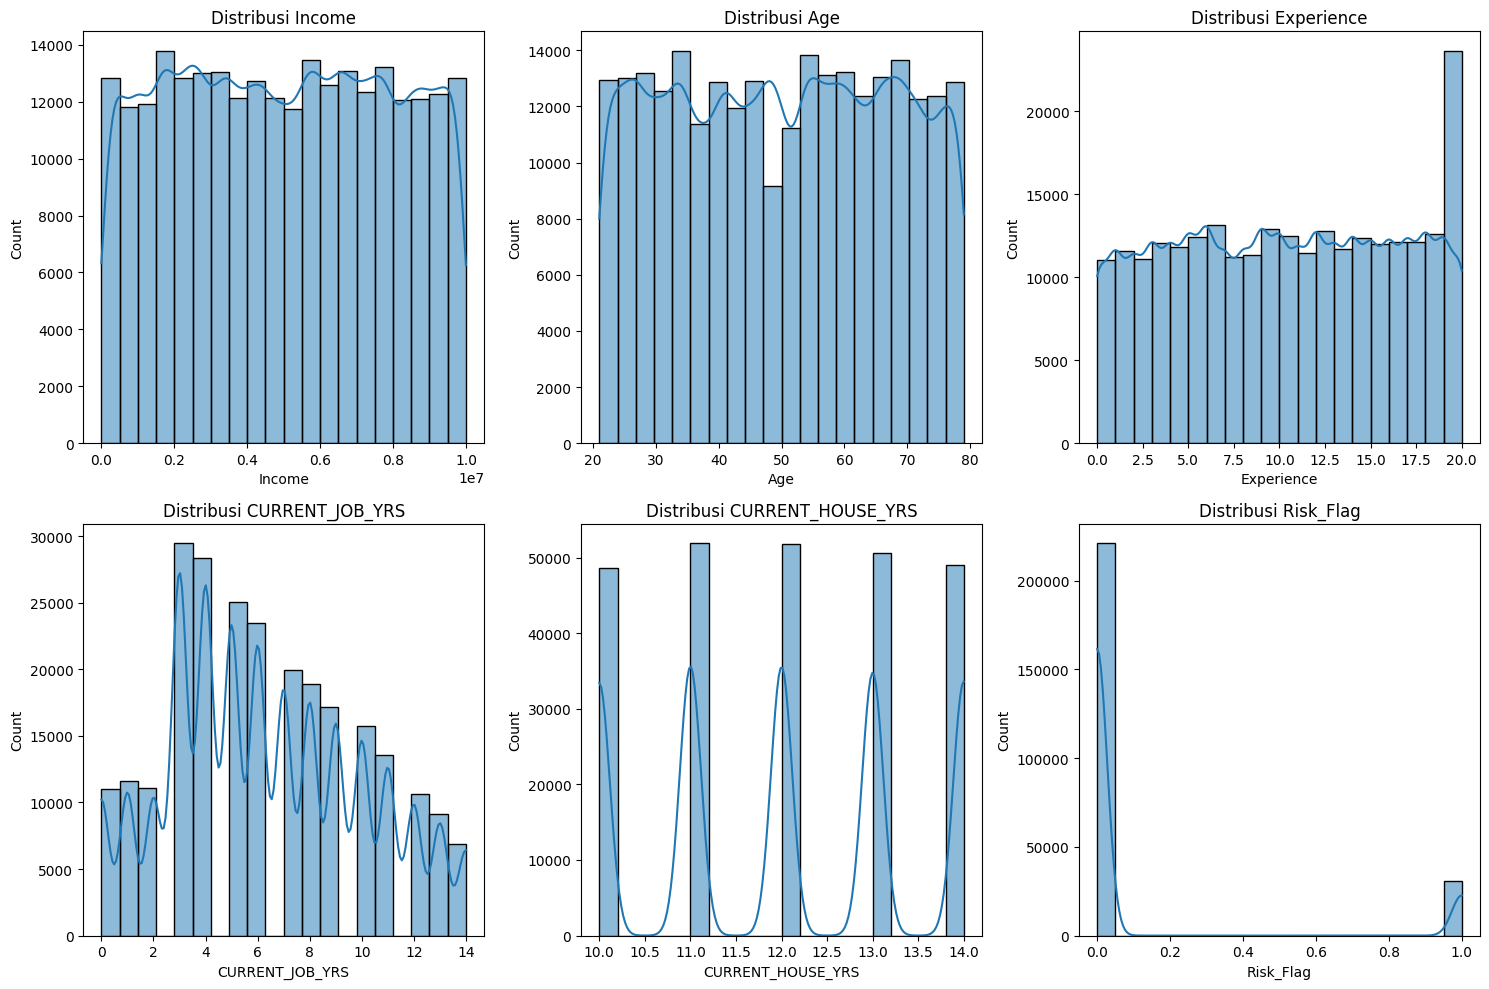

In [6]:
# Memvisualisasikan distribusi fitur numerik
# Memvisualisasikan distribusi fitur numerik dengan kurva distribusi
numerical_features = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag']
plt.figure(figsize=(15, 10))
for feature in numerical_features:
    plt.subplot(2, 3, numerical_features.index(feature) + 1)
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f'Distribusi {feature}')

plt.tight_layout()
plt.show()

In [25]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag', 'Generation',
       'Profession_Group', 'Experience_Ratio', 'Job_House_Duration_Ratio'],
      dtype='object')

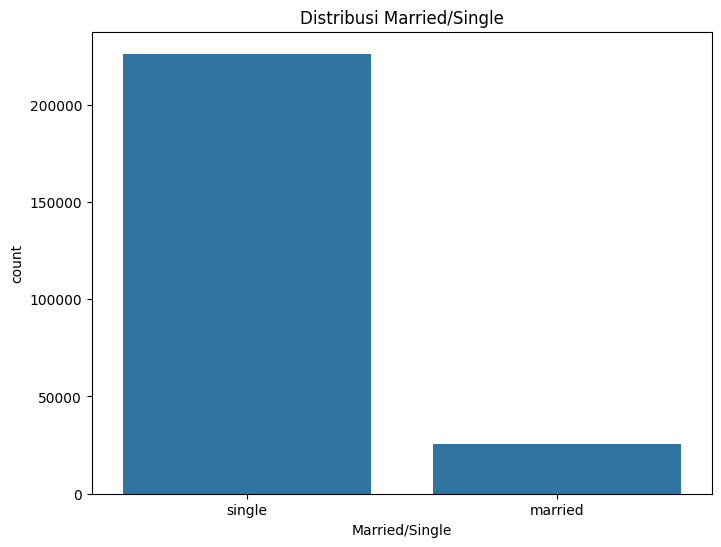

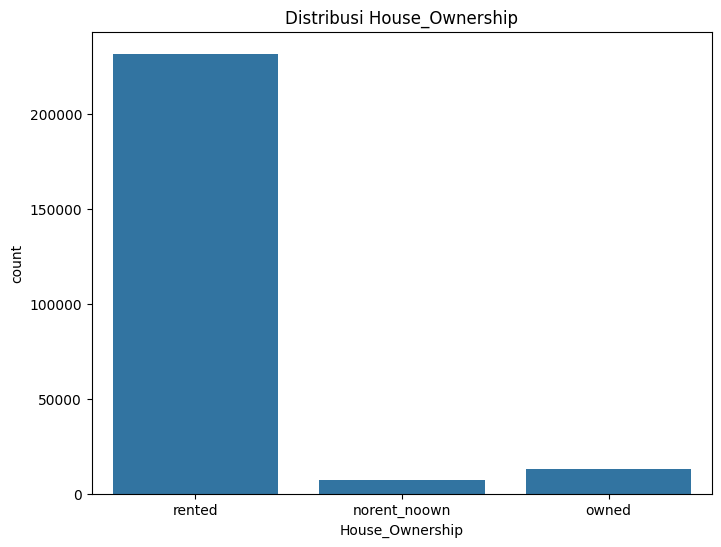

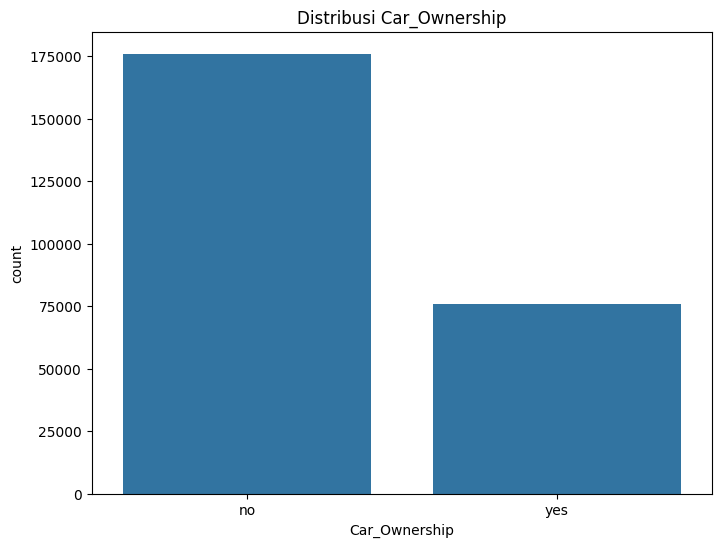

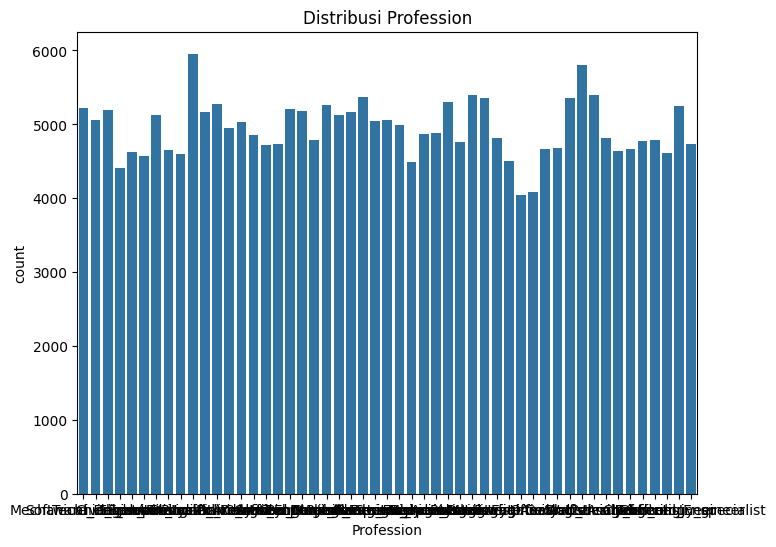

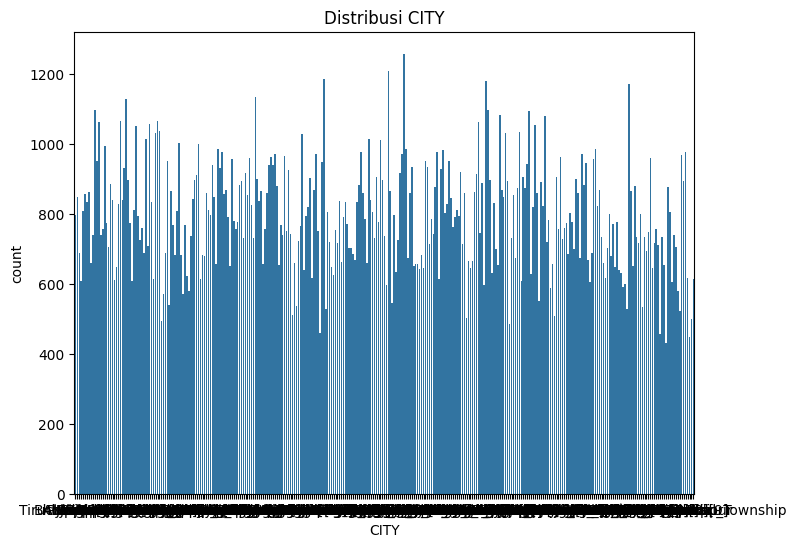

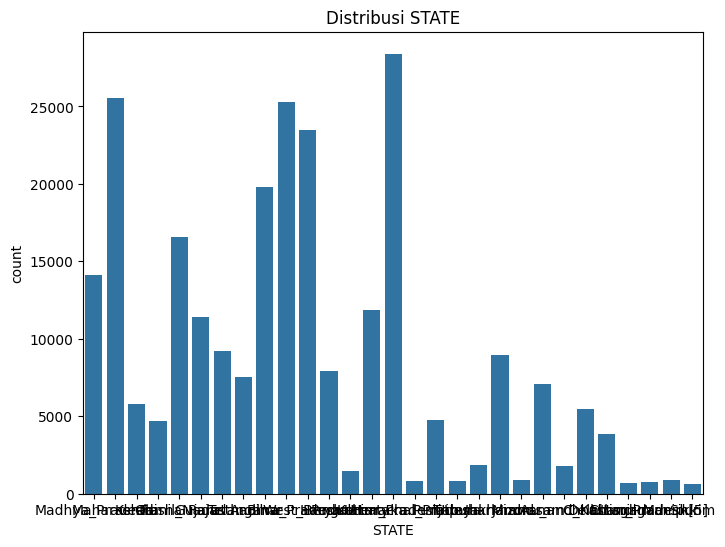

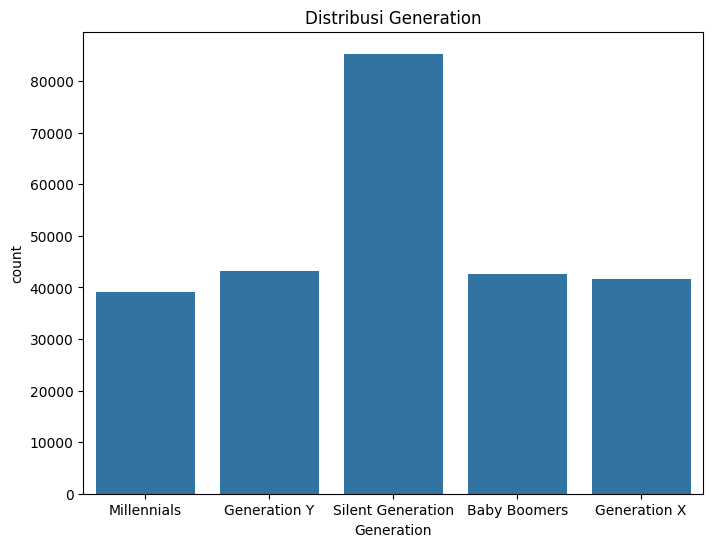

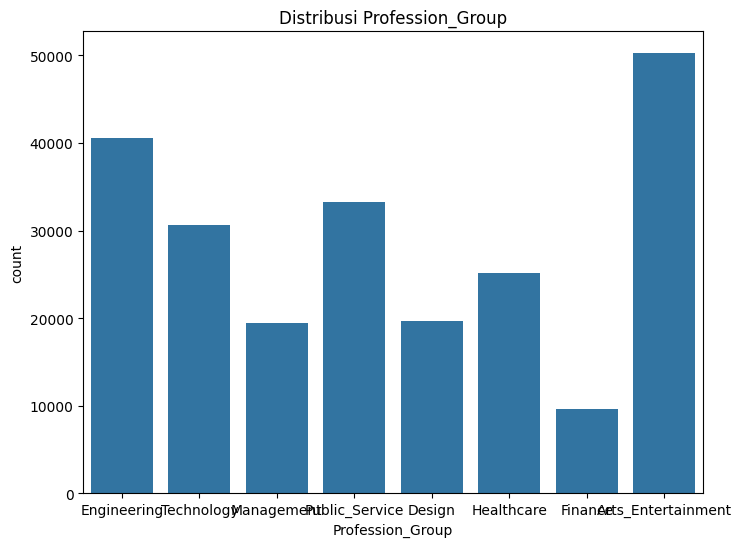

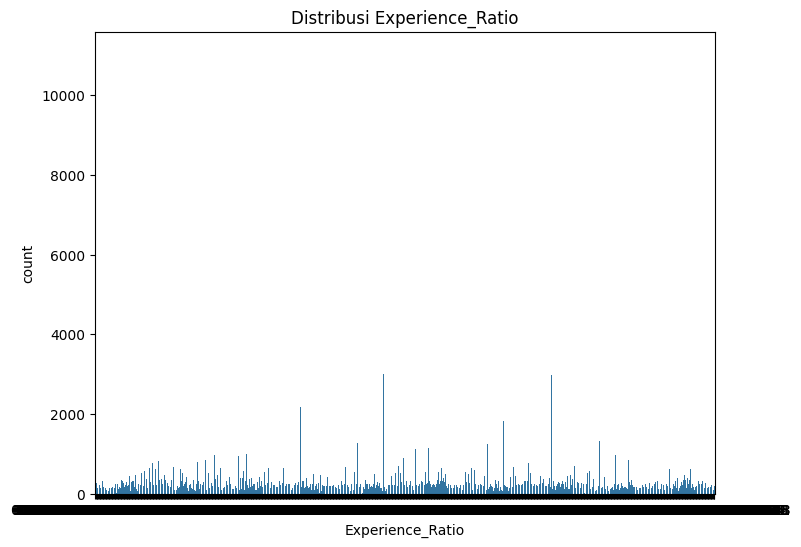

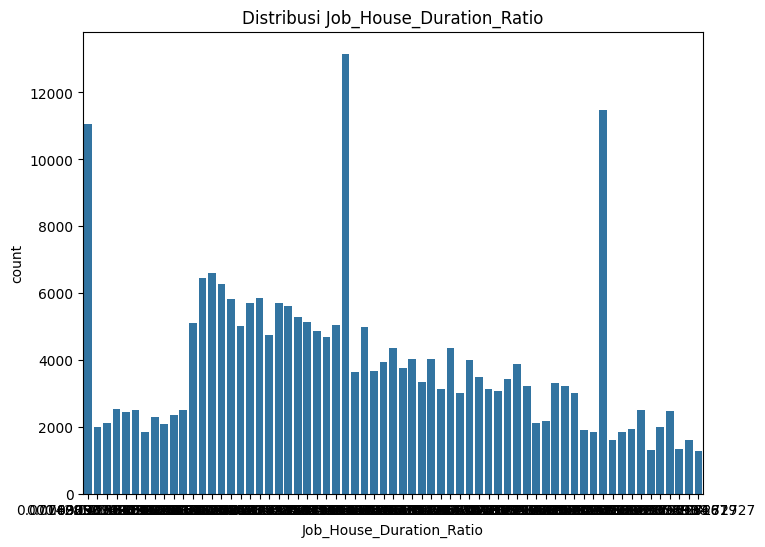

In [26]:
# Memvisualisasikan distribusi fitur kategorik
categorical_features = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE', 'Generation', 'Profession_Group', 'Experience_Ratio', 'Job_House_Duration_Ratio']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribusi {feature}')
    plt.show()

# Multivariate Analysis

<ipython-input-9-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

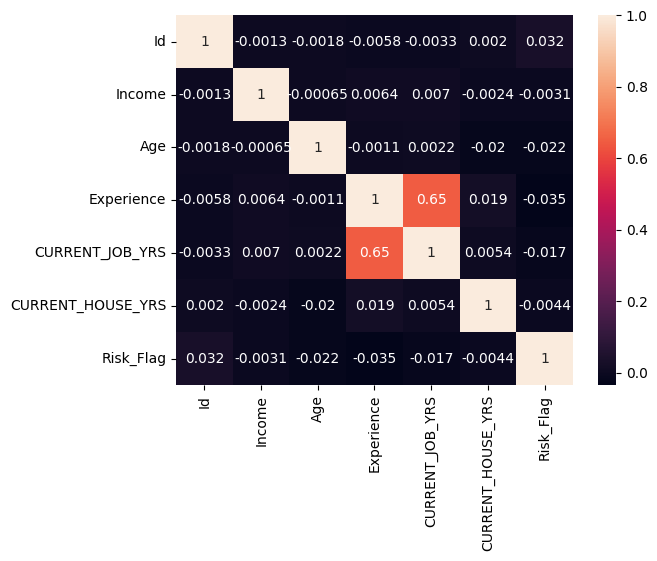

In [9]:
sns.heatmap(df.corr(), annot=True)

In [11]:
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Age_Bins,Profession_Group,Experience_Ratio,Job_House_Duration_Ratio
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,20-25,Engineering,0.130435,0.230769
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,41-45,Technology,0.250000,0.692308
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,66-70,Technology,0.060606,0.400000
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,41-45,Technology,0.048780,0.166667
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,46-50,Management,0.234043,0.214286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0,41-45,Healthcare,0.302326,0.545455
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0,26-30,Public_Service,0.384615,0.545455
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0,46-50,Engineering,0.152174,0.583333
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0,46-50,Design,0.000000,0.000000


<Axes: xlabel='Age_Bins', ylabel='count'>

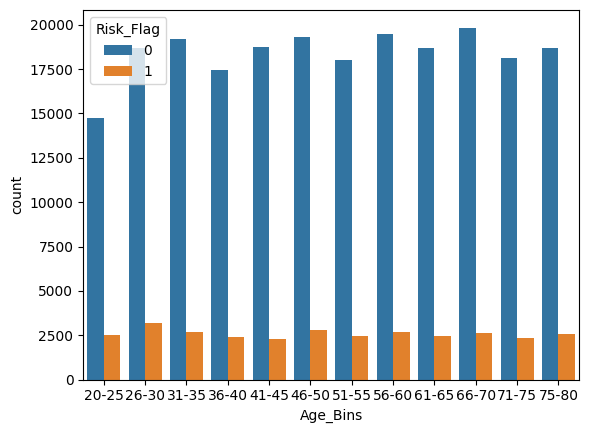

In [12]:
sns.countplot(x='Age_Bins', hue='Risk_Flag', data=df)

<Axes: xlabel='Income', ylabel='Risk_Flag'>

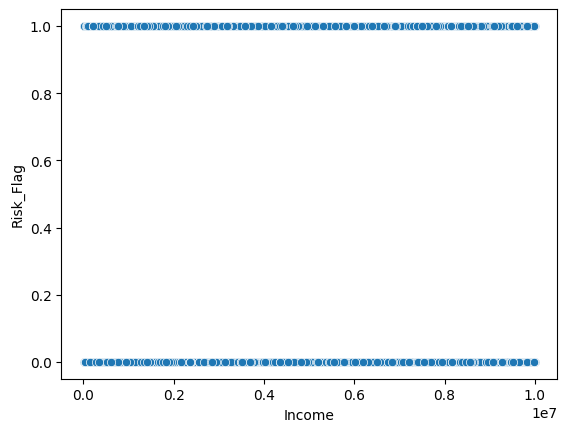

In [13]:
sns.scatterplot(x='Income', y='Risk_Flag', data=df)

<Axes: xlabel='Experience', ylabel='count'>

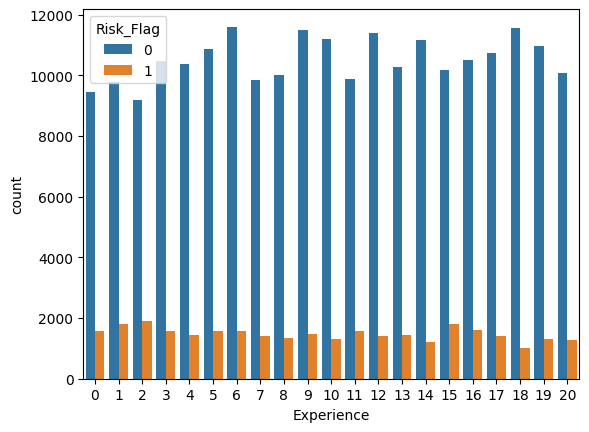

In [14]:
sns.countplot(x='Experience', hue='Risk_Flag', data=df)

<Axes: xlabel='CURRENT_HOUSE_YRS', ylabel='count'>

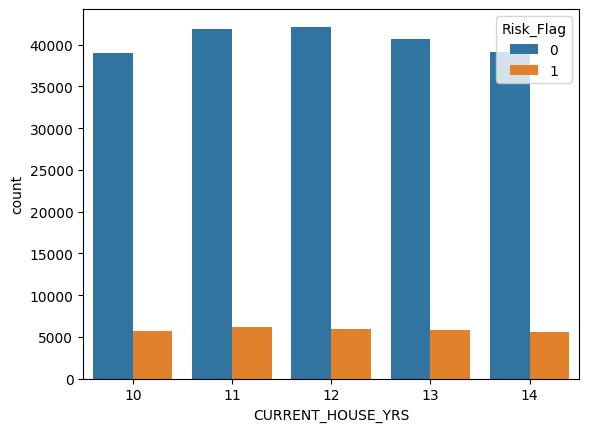

In [15]:
sns.countplot(x='CURRENT_HOUSE_YRS', hue='Risk_Flag', data=df[df['House_Ownership']=='rented'])